In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'

# 0. Carga de datos

Como buena práctica para la carga de datos, es recomendado usar la función `os.path.join` de python para trabajar con directorios, ya que esta permite trabajar en distintos sistemas operativos sin mayores problemas, ya que, el manejo de directorios en Windows es distinto al de un sistema Unix-like (como macOS y linux).

In [2]:
data_path = ['..', 'm02_data_analysis', 'm02_c04_data_aggregation', 'data', 'pokemon.csv']
data_path = os.path.join(*data_path)
df = pd.read_csv(data_path)
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


# 1. Manejo de datos y visualizaciones

Lo esencial de pandas, al fin y al cabo, es procesar datos, y el procesamiento más común que se suele hacer es agrupar datos, por eso es importante entender bien como funciona y qué es lo que hacemos con un `.groupby` por ejemplo.

En el caso de las visualizaciones, esta es la operación más frecuente, ya que estas intentan contar una historia a simple vista, y su fin es agregar la mayor cantidad de información visualmente.

En el caso de `matplotlib`, hay 2 formas de trabajar con visualizaciones:
* Usando la forma tradicional, que es pasándole los datos a las funciones de `matplotlib.pyplot`
* Usando el `wrapper` de `pandas`

## 1.1 Visualizaciones

In [3]:
pokemon_types = ((df['Type 1']
 .value_counts() + df['Type 2'].value_counts())
 .sort_values(ascending=False)
)
pokemon_types

Water       126
Normal      102
Flying      101
Grass        95
Psychic      90
Bug          72
Ground       67
Fire         64
Poison       62
Rock         58
Fighting     53
Dark         51
Electric     50
Dragon       50
Steel        49
Ghost        46
Fairy        40
Ice          38
dtype: int64

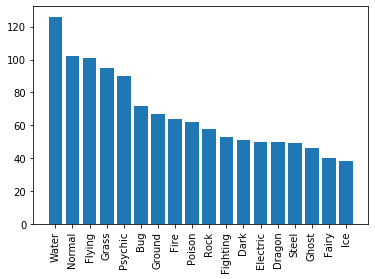

In [4]:
fig, ax = plt.subplots()

x = pokemon_types.index
y = pokemon_types.values

ax.bar(x, y)
plt.xticks(rotation=90);

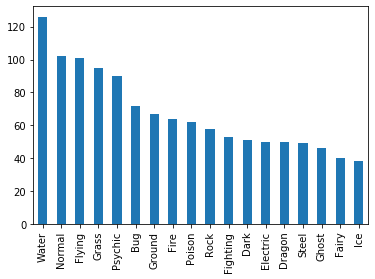

In [5]:
ax = (df
 .pipe(lambda x: x['Type 1'].value_counts() + x['Type 2'].value_counts())
 .sort_values(ascending=False)
 .plot(kind='bar')
)

In [6]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [7]:
stats = df.columns[4:10].tolist()
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

(0, 83.92059098705754)

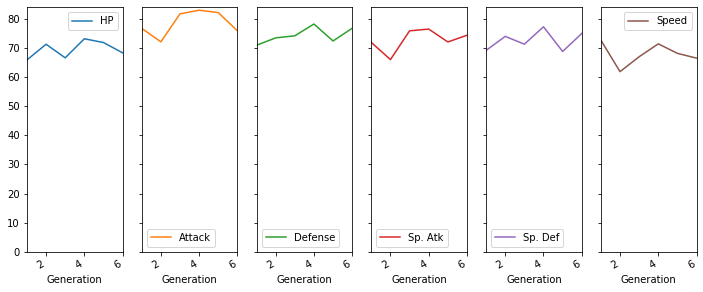

In [8]:
axes = (df
 .loc[:, ['Generation'] + stats]
 .groupby('Generation')
 .mean()
 .plot(kind='line', layout=(1, 6), figsize=(12, 5), subplots=True, sharey=True)
)

axes = axes.ravel()
y_lim = axes[0].get_ylim()
axes[0].set_ylim((0, y_lim[1]))

# plt.tight_layout()

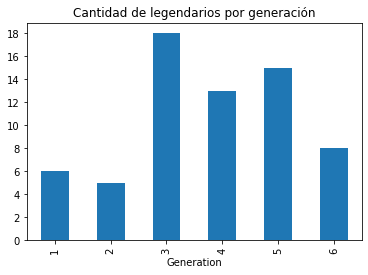

In [9]:
ax = (df
 .groupby('Generation')
 .Legendary.sum()
 .plot(kind='bar', title='Cantidad de legendarios por generación')
)

ylims = ax.get_ylim()
ax.set_yticks(range(0, int(ylims[1]) + 1, 2));

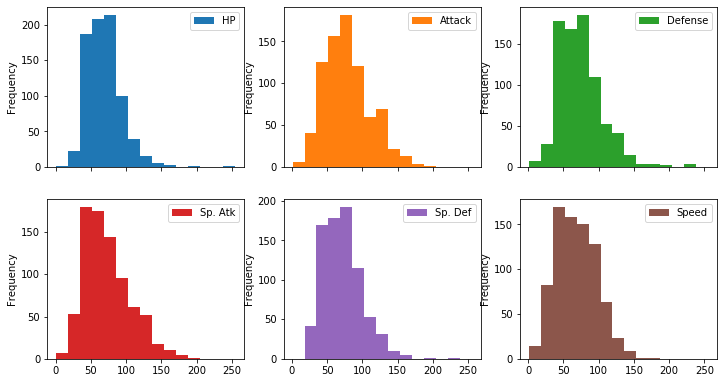

In [10]:
(df
 [stats]
 .plot(kind='hist', subplots=True, bins=15, layout=(3, 3), figsize=(12, 10))
);

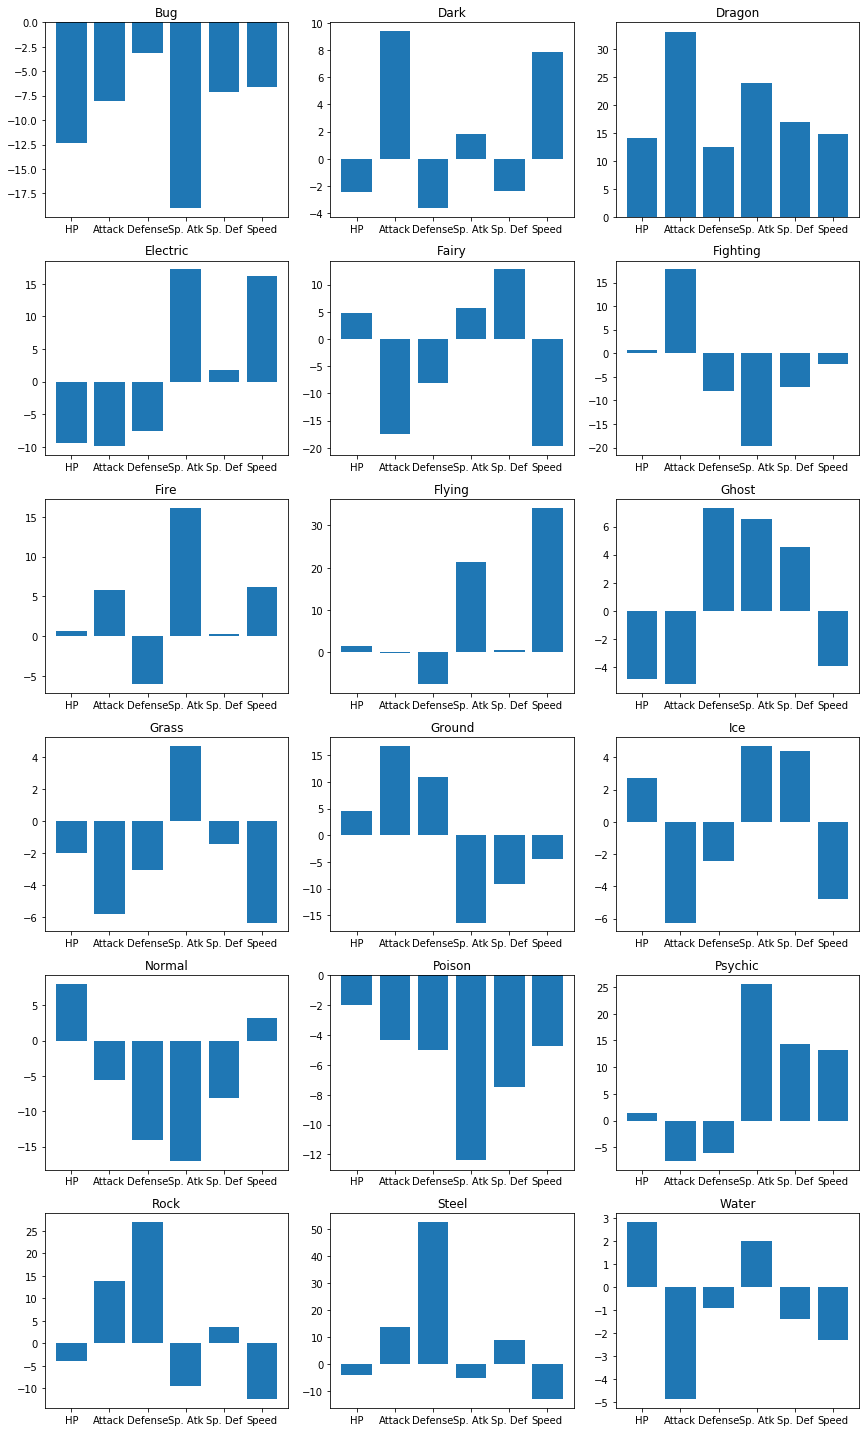

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 20))
axes = axes.ravel()

for (key, group), ax in zip(df.loc[:, ['Type 1'] + stats].groupby('Type 1'), axes):
    mean_group = group.mean()
    data = mean_group - df.loc[:, stats].mean()
    ax.bar(data.index, data.values)
    ax.set_title(key)
    
plt.tight_layout()
    

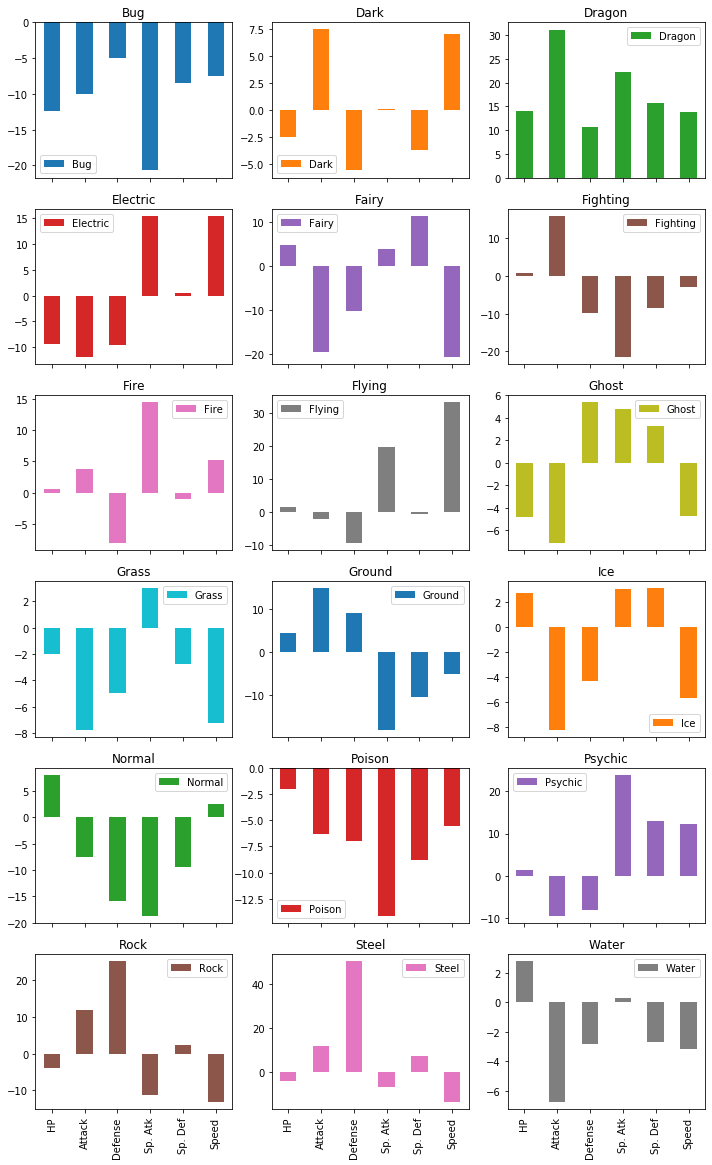

In [12]:
(df
 .loc[:, ['Type 1'] + stats]
 .groupby('Type 1')
 .mean()
 .pipe(lambda x: x - x.mean())
 .T
 .plot(kind='bar', layout=(6, 3), subplots=True, figsize=(12, 20))
);

## Altair

In [13]:
import altair as alt

In [14]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [28]:
melted = (df
 .melt(id_vars='Name', value_vars=['Type 1', 'Type 2'])
 .dropna()
)

In [29]:
melted

,Name,variable,value
0,Bulbasaur,Type 1,Grass
1,Ivysaur,Type 1,Grass
2,Venusaur,Type 1,Grass
3,Mega Venusaur,Type 1,Grass
4,Charmander,Type 1,Fire
...,...,...,...
1595,Diancie,Type 2,Fairy
1596,Mega Diancie,Type 2,Fairy
1597,Hoopa Confined,Type 2,Ghost
1598,Hoopa Unbound,Type 2,Dark


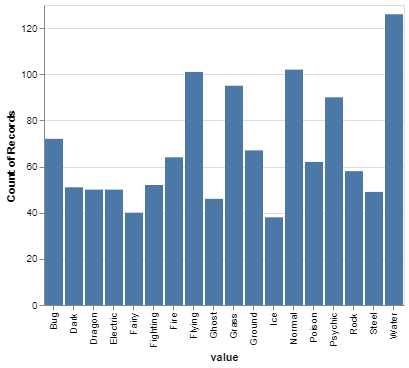

In [32]:
alt.Chart(melted).mark_bar().encode(
    x=alt.X('value:N'),
    y='count()'
)

In [27]:
melted = (df
 .melt(id_vars='Generation', value_vars=stats)
)
melted.head()

,Generation,variable,value
0,1,HP,45
1,1,HP,60
2,1,HP,80
3,1,HP,80
4,1,HP,39


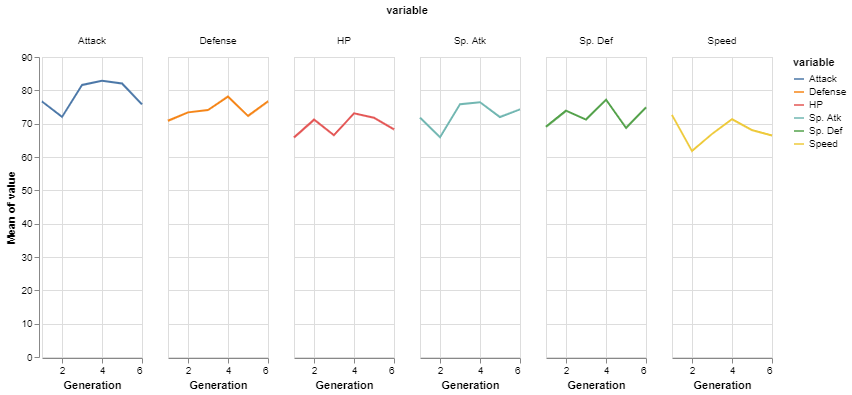

In [19]:
alt.Chart(melted).mark_line().encode(
    x='Generation',
    y='mean(value)',
    color='variable',
    column='variable'
).properties(width=100)